In [7]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.4 MB/s eta 0:00:00


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [9]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/Users/kartikeysingh/Desktop/firstproject/calories.csv')

In [10]:
# print the first 20 rows of the dataframe
calories.head(20)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
5,15130815,123.0
6,19602372,112.0
7,11117088,143.0
8,12132339,134.0
9,17964668,72.0


In [11]:
exercise_data = pd.read_csv('/Users/kartikeysingh/Desktop/firstproject/exercise.csv')

In [12]:
exercise_data.head(20)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
5,15130815,female,36,151.0,50.0,23.0,96.0,40.7
6,19602372,female,33,158.0,56.0,22.0,95.0,40.5
7,11117088,male,41,175.0,85.0,25.0,100.0,40.7
8,12132339,male,60,186.0,94.0,21.0,97.0,40.4
9,17964668,female,26,146.0,51.0,16.0,90.0,40.2


### **Combining the two Dataframes**

In [13]:
calories_data = pd.concat ([exercise_data, calories[ 'Calories']], axis=1)

In [15]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
# checking the number of rows and columns
calories_data.shape

(15000, 9)

In [17]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
# checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

### **Data Analysis**

In [20]:
# get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


### **Data Visualization**

In [21]:
sns.set()

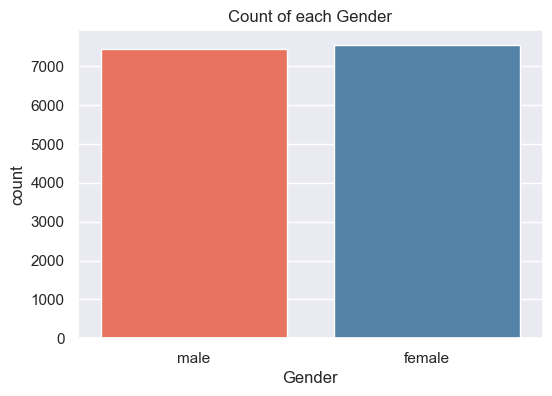

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(
    x='Gender', 
    hue='Gender',           # assign hue
    data=calories_data, 
    palette=['#FF6347', '#4682B4'],  # colors
    dodge=False             
)
plt.legend([],[], frameon=False)   
plt.title("Count of each Gender")
plt.show()

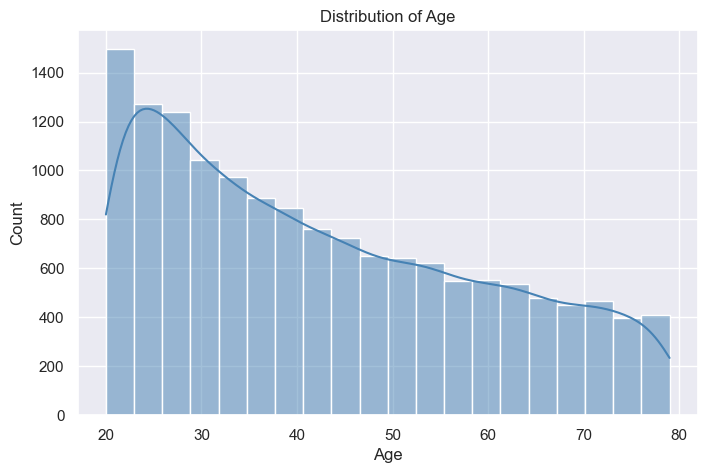

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=calories_data,
    x='Age',
    bins=20,       # number of bins
    kde=True,      # adds the density curve
    color='#4682B4'
)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()  
plt.figure(figsize=(8,5))
sns.histplot(
    data=calories_data,
    x='Age',
    bins=20,       # number of bins
    kde=True,      # adds the density curve
    color='#4682B4'
)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()  

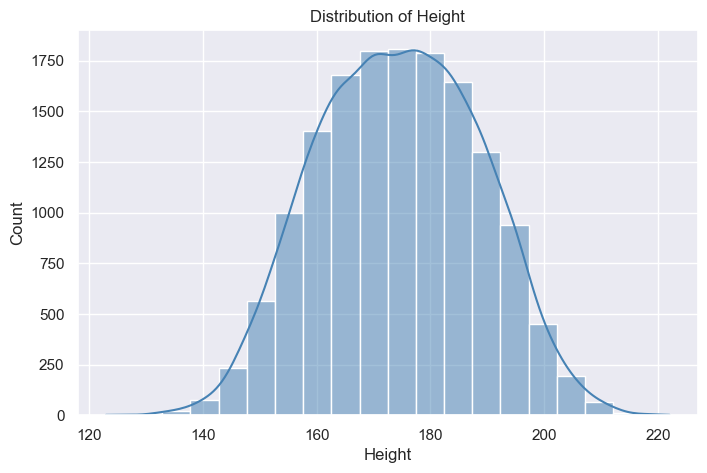

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=calories_data,
    x='Height',
    bins=20,       # number of bins
    kde=True,      # adds the density curve
    color='#4682B4'
)
plt.title("Distribution of Height")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()  

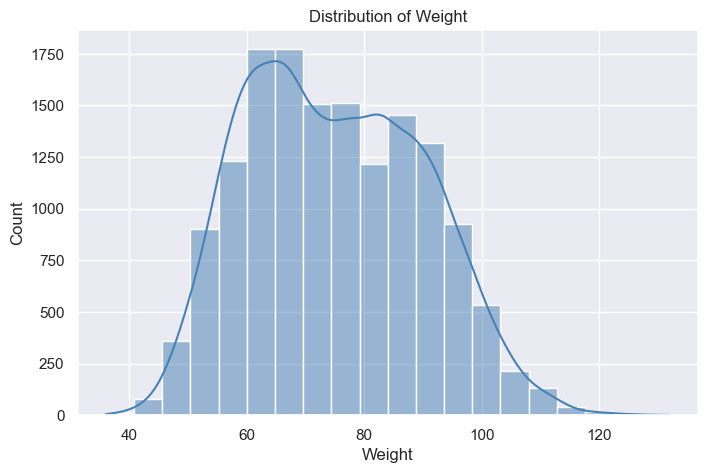

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=calories_data,
    x='Weight',
    bins=20,       # number of bins
    kde=True,      # adds the density curve
    color='#4682B4'
)
plt.title("Distribution of Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.show()  

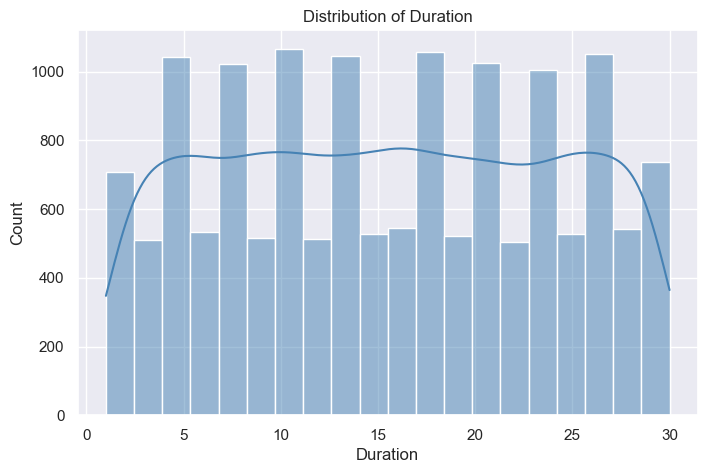

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=calories_data,
    x='Duration',
    bins=20,       # number of bins
    kde=True,      # adds the density curve
    color='#4682B4'
)
plt.title("Distribution of Duration")
plt.xlabel("Duration")
plt.ylabel("Count")
plt.show()  

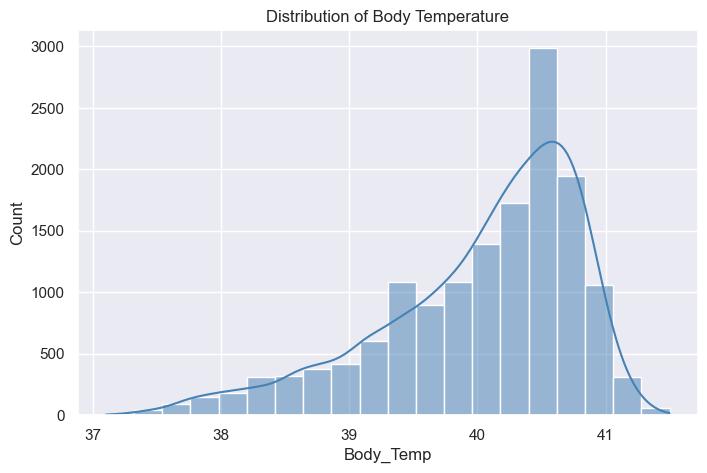

In [43]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=calories_data,
    x='Body_Temp',
    bins=20,       # number of bins
    kde=True,      # adds the density curve
    color='#4682B4'
)
plt.title("Distribution of Body Temperature")
plt.xlabel("Body_Temp")
plt.ylabel("Count")
plt.show()  

### **Finding the Correlation in the Dataset**

#### **1.Positive Correlation**
#### **2.Negative Correlation**

In [47]:
correlation = calories_data.select_dtypes(include='number').corr()
print(correlation)

             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   
Gender_num  0.000687 -0.003222 -0.710534 -0.783186 -0.003440   -0.011555   

            Body_Temp  Calories  Gender_num  
User_ID      0.000923 -0.001661    0.000687  
Age          0.013175  0.154395   -0.003222  
Height       0.001200  0.017537   -0.710534  
Weight       0.004095  0.035481   -0.783186  
Duration 

In [50]:
# Select only numeric columns
numeric_data = calories_data.select_dtypes(include='number')

# Compute correlation
correlation = numeric_data.corr()

# Display
print(correlation)


             User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   
Gender_num  0.000687 -0.003222 -0.710534 -0.783186 -0.003440   -0.011555   

            Body_Temp  Calories  Gender_num  
User_ID      0.000923 -0.001661    0.000687  
Age          0.013175  0.154395   -0.003222  
Height       0.001200  0.017537   -0.710534  
Weight       0.004095  0.035481   -0.783186  
Duration 

<Axes: >

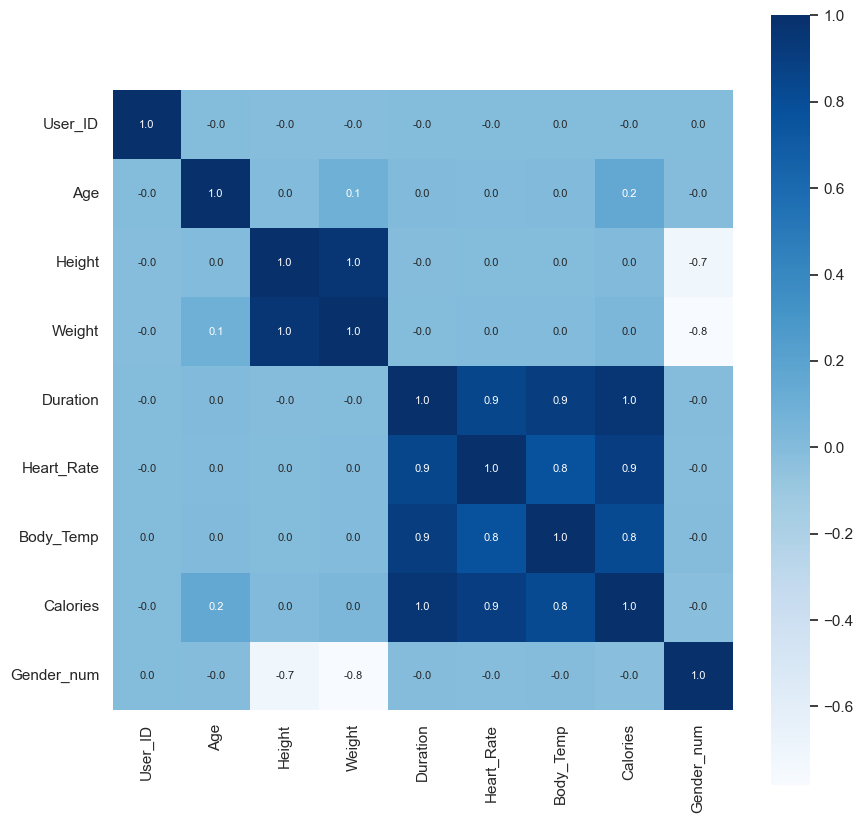

In [55]:
plt. figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### **Converting the Text Data to Numerical Values**

In [63]:
calories_data['Gender'] = calories_data['Gender'].replace({'male':0, 'female':1}).astype(int)


In [65]:
calories_data.head(10)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_num
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0,0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0,0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0,1
5,15130815,1,36,151.0,50.0,23.0,96.0,40.7,123.0,1
6,19602372,1,33,158.0,56.0,22.0,95.0,40.5,112.0,1
7,11117088,0,41,175.0,85.0,25.0,100.0,40.7,143.0,0
8,12132339,0,60,186.0,94.0,21.0,97.0,40.4,134.0,0
9,17964668,1,26,146.0,51.0,16.0,90.0,40.2,72.0,1


### **Separating features and Target**

In [66]:
X = calories_data.drop(columns=['User_ID', 'Calories'], axis=1)
Y = calories_data['Calories']

In [67]:
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0           0   68   190.0    94.0      29.0       105.0       40.8   
1           1   20   166.0    60.0      14.0        94.0       40.3   
2           0   69   179.0    79.0       5.0        88.0       38.7   
3           1   34   179.0    71.0      13.0       100.0       40.5   
4           1   27   154.0    58.0      10.0        81.0       39.8   
...       ...  ...     ...     ...       ...         ...        ...   
14995       1   20   193.0    86.0      11.0        92.0       40.4   
14996       1   27   165.0    65.0       6.0        85.0       39.2   
14997       1   43   159.0    58.0      16.0        90.0       40.1   
14998       0   78   193.0    97.0       2.0        84.0       38.3   
14999       0   63   173.0    79.0      18.0        92.0       40.5   

       Gender_num  
0               0  
1               1  
2               0  
3               1  
4               1  
...           ...  
14995  

In [68]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


### **Splitting the data into training data and Test data**

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [71]:
print (X.shape, X_train.shape, X_test.shape)

(15000, 8) (12000, 8) (3000, 8)


### **Model Training**

#### **XGBoost Regressor**

In [72]:
# loading the model
model = XGBRegressor()

In [73]:
 # training the model with X_ train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### **Evaluation**

#### **Prediction on Test Data**

In [74]:
 test_data_prediction = model.predict(X_test)

In [75]:
print( test_data_prediction)

[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]


#### **Mean Absolute Error**

In [76]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [77]:
print("Mean Absolute Error =", mae)

Mean Absolute Error = 1.4833678883314132
